In [1]:
import networkx as nx
import syft as sy
import numpy as np

from syft.service.action.action_graph import Action, ActionGraph, ActionGraphNode, InMemoryGraphClient, UID
from syft.service.action.numpy import NumpyArrayObject, ActionObject

print(sy.__version__)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.0-beta.8


In [2]:
worker = sy.Worker()
admin_client = worker.root_client

> Worker: Romantic Gardner - 19287b7c4df449998ebdf90a7473061d - NodeType.DOMAIN

Services:
ActionService
DataSubjectMemberService
DataSubjectService
DatasetService
MessageService
MetadataService
NetworkService
PolicyService
ProjectService
RequestService
UserCodeService
UserService


In [3]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action_obj_b = ActionObject.from_obj([2, 3, 4])

Save the action objects to the action store

In [4]:
admin_client.api.services.action.set(action_obj_a)
admin_client.api.services.action.set(action_obj_b)

[2, 3, 4]

In [5]:
print(worker.action_store)
worker.action_store.data

,key,type,id
0,11bd3aa8fb9c486faaaa0fb343ba3465,"[1, 2, 3]",11bd3aa8fb9c486faaaa0fb343ba3465
1,f1f7699f81834054a4605bbd6287913f,"[2, 3, 4]",f1f7699f81834054a4605bbd6287913f


Make the actions

In [6]:
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_a.syft_lineage_id],
    kwargs={}
)

action1

```python
class Action:
  id: str = a3c6320ebf3443aea9d5ab7554050b78
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 11bd3aa8fb9c486faaaa0fb343ba3465 - 1771010845721786342>]
  kwargs: str = {}
  result_id: str = 41c10f1cbb9040bbabaa064ffa871508

```

In [7]:
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)

action2

```python
class Action:
  id: str = 1714cd1be0ac4166bd8ebb5cb3035ebc
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: f1f7699f81834054a4605bbd6287913f - 1448937219508245536>]
  kwargs: str = {}
  result_id: str = a912844f919149a6b853779571eb6a88

```

Create the action graph

In [8]:
graph = ActionGraph(node_uid=worker.id, graph_client=InMemoryGraphClient)
graph

Add the actions

In [9]:
graph.add_action(action1)
graph.add_action(action2)

parents = set()
parents = set()


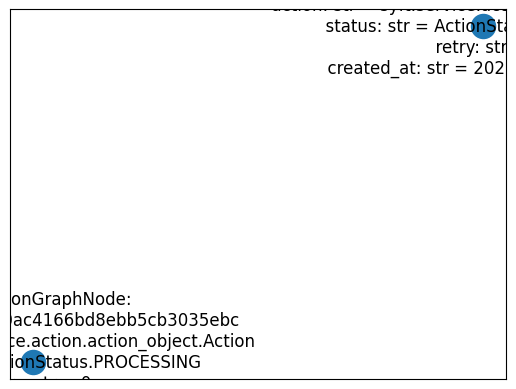

In [10]:
graph.draw_graph()

In [11]:
graph.client.nodes

NodeView((class ActionGraphNode:
  id: str = a3c6320ebf3443aea9d5ab7554050b78
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-19 06:55:37
, class ActionGraphNode:
  id: str = 1714cd1be0ac4166bd8ebb5cb3035ebc
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-19 06:55:37
))

Create a third action that depends on the previous 2 actions

In [12]:
action_1_result = ActionObject.from_obj(syft_action_data=np.array(action_obj_a.syft_action_data), 
                                        id=action1.result_id.id)

In [13]:
type(action_1_result)

syft.service.action.numpy.NumpyArrayObject

In [14]:
action_1_result.id == action1.result_id.id

True

In [15]:
action_2_result = ActionObject.from_obj(syft_action_data=np.array(action_obj_b.syft_action_data), 
                                        id=action2.result_id.id)

do something like `array_1.__add__(array_2)`

In [16]:
action_res = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_1_result.syft_lineage_id,
    args=[action_2_result.syft_lineage_id],
    kwargs={}
)

In [17]:
action_res

```python
class Action:
  id: str = 735ea27d40094c4da8b16da511084cc6
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = 41c10f1cbb9040bbabaa064ffa871508
  args: str = [<LineageID: a912844f919149a6b853779571eb6a88 - 65190121694410728>]
  kwargs: str = {}
  result_id: str = 1776f0b12e574e239e507783f2775ec5

```

In [18]:
graph.add_action(action_res)

parents = {class ActionGraphNode:
  id: str = a3c6320ebf3443aea9d5ab7554050b78
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-19 06:55:37
, class ActionGraphNode:
  id: str = 1714cd1be0ac4166bd8ebb5cb3035ebc
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-19 06:55:37
}


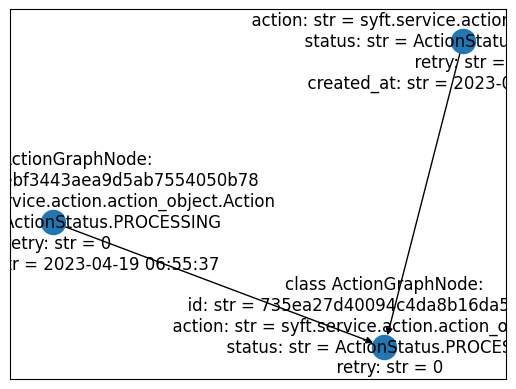

In [19]:
graph.draw_graph()

In [20]:
graph.is_parent(parent=action2, child=action_res)

True

In [22]:
graph.is_parent(parent=action1, child=action_res)

True

In [23]:
graph.is_parent(parent=action2, child=action1)

False

In [24]:
!ls

'Action Graph.ipynb'   G.gexf			 Server.ipynb
 Client.ipynb	      'Queue Primitives.ipynb'	 Sink.ipynb


In [25]:
graph.save("G.gexf")

In [26]:
graph2 = ActionGraph(node_uid=worker.id, graph_client=InMemoryGraphClient)

graph2.load("G.gexf")

In [33]:
list(graph.nodes())

,type,id
0,class ActionGraphNode:\n id: str = a3c6320ebf...,a3c6320ebf3443aea9d5ab7554050b78
1,class ActionGraphNode:\n id: str = 1714cd1be0...,1714cd1be0ac4166bd8ebb5cb3035ebc
2,class ActionGraphNode:\n id: str = 735ea27d40...,735ea27d40094c4da8b16da511084cc6


In [46]:
list(graph2.nodes())

['class ActionGraphNode:\n  id: str = a3c6320ebf3443aea9d5ab7554050b78\n  action: str = syft.service.action.action_object.Action\n  status: str = ActionStatus.PROCESSING\n  retry: str = 0\n  created_at: str = 2023-04-19 06:55:37\n',
 'class ActionGraphNode:\n  id: str = 1714cd1be0ac4166bd8ebb5cb3035ebc\n  action: str = syft.service.action.action_object.Action\n  status: str = ActionStatus.PROCESSING\n  retry: str = 0\n  created_at: str = 2023-04-19 06:55:37\n',
 'class ActionGraphNode:\n  id: str = 735ea27d40094c4da8b16da511084cc6\n  action: str = syft.service.action.action_object.Action\n  status: str = ActionStatus.PROCESSING\n  retry: str = 0\n  created_at: str = 2023-04-19 06:55:49\n']

In [47]:
type(list(graph2.nodes())[0])

str

In [48]:
list(graph.nodes())[0]

syft.service.action.action_graph.ActionGraphNode

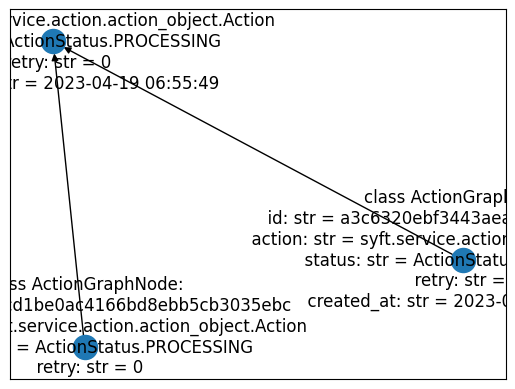

In [29]:
graph2.draw_graph()

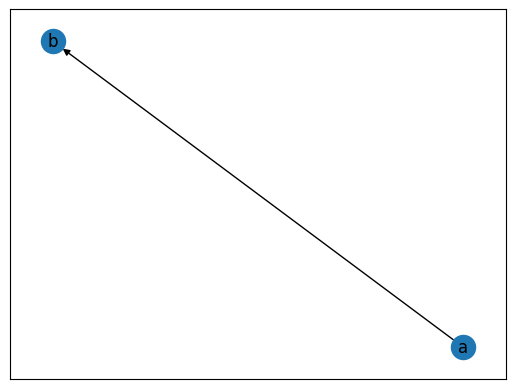

In [22]:
 
G = nx.DiGraph() # a directed graph
G.add_edge('a', 'b')
nx.draw_networkx(G, with_labels=True)
G.predecessors('b')
#  Out[4]: ['a']
#  In [5]: G.pred['b']
#  Out[5]: {'a': {}}

In [23]:
list(G.predecessors('b')

SyntaxError: incomplete input (3408318441.py, line 1)